In [6]:
import ncar_jobqueue

In [7]:
cluster = ncar_jobqueue.NCARCluster(
#    cores=9,  # The number of cores you want
    memory='100GB',  # Amount of memory
#    processes=9,  # How many processes
    walltime='06:00:00',  # Amount of wall time
    project="ncgd0011",  #Project id
)

cluster.scale(16)


/glade/u/home/pmora/.conda/envs/etpac/lib/python3.9/site-packages/distributed/node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 39192 instead
  warnings.warn(


In [3]:
import sys
print (sys.version)

3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) 
[GCC 10.3.0]


In [8]:
%matplotlib inline
%load_ext autoreload
%load_ext watermark

from etpac import annotate_stats
import dask
import distributed
import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import xarray as xr
#import xgcm
import cartopy.crs as cr
from cartopy import feature as cf

mpl.rcParams["savefig.dpi"] = 300
mpl.rcParams["savefig.bbox"] = "tight"
mpl.rcParams["figure.dpi"] = 180

xr.set_options(keep_attrs=True, display_style="html")

%watermark -iv

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
cartopy      : 0.19.0.post1
numpy        : 1.20.3
json         : 2.0.9
matplotlib   : 3.5.3
distributed  : 2021.6.0
ncar_jobqueue: 2021.4.14
dask         : 2021.6.0
pandas       : 1.4.4
xarray       : 0.18.2
sys          : 3.9.4 | packaged by conda-forge | (default, May 10 2021, 22:13:33) 
[GCC 9.3.0]



In [9]:
client = distributed.Client(cluster)
client

Client Scheduler: tcp://10.12.206.59:41702 Dashboard: https://jupyterhub.hpc.ucar.edu/stable/user/pmora/proxy/39192/status,Cluster Workers: 16 Cores: 32 Memory: 400.00 GiB


In [10]:
files = '/glade/scratch/pmora/monthly_Ekman_pumping.nc'
files2 = '/glade/scratch/pmora/month_w_zi_0-85m.nc' 


In [11]:
DS = xr.open_mfdataset(
    files,
    compat="override",
    data_vars="minimal",
    coords="minimal",
    parallel=True,
    concat_dim="time",
    combine="nested",
)
#[["so", "thetao", "uo", "vo", "wo"]]

DS2 = xr.open_mfdataset(
    files2,
    compat="override",
    data_vars="minimal",
    coords="minimal",
    parallel=True,
    concat_dim="time",
    combine="nested",
)

In [12]:
DS = DS.rename({'__xarray_dataarray_variable__': 'Ep'})

In [13]:
Ep = DS["Ep"]
Ep

<xarray.DataArray 'Ep' (month: 12, yh: 340, xh: 460)>
dask.array<open_dataset-a6dcafafcdf51bb927f54154919edd73__xarray_dataarray_variable__, shape=(12, 340, 460), dtype=float64, chunksize=(12, 340, 460), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 260.0 260.1 260.1 260.2 ... 282.8 282.9 282.9 283.0
  * yh       (yh) float64 0.025 0.075 0.125 0.125 ... 16.82 16.88 16.93 16.93
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Ekman Pumping
    units:      m da-1

In [14]:
wo=DS2["wo"]
wo

<xarray.DataArray 'wo' (month: 12, z_i: 35, yh: 340, xh: 460)>
dask.array<open_dataset-7462d43bbcd0257b613dbca1c44a675ewo, shape=(12, 35, 340, 460), dtype=float32, chunksize=(12, 35, 340, 460), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 260.0 260.1 260.1 260.2 ... 282.8 282.9 282.9 283.0
  * yh       (yh) float64 0.025 0.075 0.125 0.125 ... 16.82 16.88 16.93 16.93
  * z_i      (z_i) float64 0.0 2.5 5.0 7.5 10.0 ... 75.0 77.5 80.0 82.5 85.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Sea water Z velocity
    units:      m s-1

In [ ]:
#wo.attrs['long_name'] = 'Ekman pumping'

In [ ]:
#Ep.attrs['long_name'] = 'Ekman pumping'

In [15]:
wo2 = wo.sel(xh=slice(272, 277), yh=slice(8, 13))              
wo2

<xarray.DataArray 'wo' (month: 12, z_i: 35, yh: 100, xh: 100)>
dask.array<getitem, shape=(12, 35, 100, 100), dtype=float32, chunksize=(12, 35, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 272.0 272.1 272.1 272.2 ... 276.8 276.9 276.9 277.0
  * yh       (yh) float64 8.025 8.075 8.125 8.175 ... 12.82 12.88 12.93 12.98
  * z_i      (z_i) float64 0.0 2.5 5.0 7.5 10.0 ... 75.0 77.5 80.0 82.5 85.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Sea water Z velocity
    units:      m s-1

In [16]:
#Ep2 = Ep.sel(xh=np.arange(272,277,0.05), yh=np.arange(8,12,0.05), method="nearest")
Ep2 = Ep.sel(xh=slice(272, 277), yh=slice(8, 13))              
Ep2

<xarray.DataArray 'Ep' (month: 12, yh: 100, xh: 100)>
dask.array<getitem, shape=(12, 100, 100), dtype=float64, chunksize=(12, 100, 100), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 272.0 272.1 272.1 272.2 ... 276.8 276.9 276.9 277.0
  * yh       (yh) float64 8.025 8.075 8.125 8.175 ... 12.82 12.88 12.93 12.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Ekman Pumping
    units:      m da-1

In [ ]:
#Corr_z5.min().values

In [ ]:
#Corr_z5.plot.contourf(xh='lon',yh='lat')

In [ ]:
count = 0
fig=plt.figure(figsize=(38,20))
for depth in range(1,35):
             count+=1
             ax=fig.add_subplot(5,7,count,projection=cr.PlateCarree())
             Corr = xr.corr(wo.isel(z_i=depth), Ep, dim="month")
             Corr.plot(cmap="coolwarm_r", cbar_kwargs={"label": ""}, levels = np.linspace(-1, 1, 11))
             annotate_stats(plt.gca(), Corr, x=0.3, y=0.4)
             ax.coastlines(resolution='10m')
             ax.add_feature(cf.BORDERS)
             ax.set_extent([-99, -78, 1,16])

In [ ]:
count = 0
fig=plt.figure(figsize=(39,24))
for depth in range(1,35):
             count+=1
             ax=fig.add_subplot(5,7,count,projection=cr.PlateCarree())
             Corr = xr.corr(wo2.isel(z_i=depth), Ep2, dim="month")
             Corr.plot(cmap="coolwarm_r", cbar_kwargs={"label": ""}, levels = np.linspace(-1, 1, 21))
             annotate_stats(plt.gca(), Corr, x=0.3, y=0.4)
             ax.coastlines(resolution='10m')
             ax.add_feature(cf.BORDERS)
             ax.set_extent([-88, -83, 8,12.5])

In [ ]:
count = 0
fig=plt.figure(figsize=(28,16))
for depth in range(4,16):
             count+=1
             ax=fig.add_subplot(3,4,count,projection=cr.PlateCarree())
             Corr = xr.corr(wo2.isel(z_i=depth), Ep2, dim="month")
             Corr.plot(cmap="coolwarm_r", cbar_kwargs={"label": ""}, levels = np.linspace(-1, 1, 21))
             annotate_stats(plt.gca(), Corr, x=0.3, y=0.2)
             ax.coastlines(resolution='10m')
             ax.add_feature(cf.BORDERS)
             ax.set_extent([-88, -83, 8,12.5])

In [17]:
wo_2 = wo2.sel(xh=slice(273, 275), yh=slice(9.5, 11.5)).isel(z_i=9).squeeze()*86400 
wo_2
#wo_2.plot.contourf(xh='lon',yh='lat',col='month',col_wrap=2)

<xarray.DataArray 'wo' (month: 12, yh: 40, xh: 40)>
dask.array<mul, shape=(12, 40, 40), dtype=float64, chunksize=(12, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 273.0 273.1 273.1 273.2 ... 274.8 274.9 274.9 275.0
  * yh       (yh) float64 9.525 9.575 9.625 9.675 ... 11.32 11.38 11.43 11.48
    z_i      float64 22.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Sea water Z velocity
    units:      m s-1

In [18]:
Ep_2 = Ep2.sel(xh=slice(273, 275), yh=slice(9.5, 11.5)) 
Ep_2

<xarray.DataArray 'Ep' (month: 12, yh: 40, xh: 40)>
dask.array<getitem, shape=(12, 40, 40), dtype=float64, chunksize=(12, 40, 40), chunktype=numpy.ndarray>
Coordinates:
  * xh       (xh) float64 273.0 273.1 273.1 273.2 ... 274.8 274.9 274.9 275.0
  * yh       (yh) float64 9.525 9.575 9.625 9.675 ... 11.32 11.38 11.43 11.48
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:  Ekman Pumping
    units:      m da-1

In [19]:
mask0 = np.ones(41)
lat = [9.625,9.675,9.725,9.775,9.825,9.825,9.825,9.825,9.825,9.875,9.925,9.975,10.025,10.075,10.125,10.175,10.225,10.275,10.325,10.375,10.425,10.475,10.525,10.575,10.625,10.675,10.725,10.775,10.825,10.875,10.925,10.975,11.025,11.075,11.125,11.175,11.225,11.275,11.325,11.375,11.4254]
lon = [-85.225,-85.275,-85.325,-85.375,-85.425,-85.475,-85.525,-85.575,-85.625,-85.675,-85.725,-85.775,-85.825,-85.825,-85.875,-85.875,-85.875,-85.875,-85.875,-85.875,-85.825,-85.825,-85.775,-85.725,-85.675,-85.725,-85.725,-85.775,-85.825,-85.875,-85.825,-85.775,-85.775,-85.825,-85.875,-85.925,-85.925,-85.975,-86.025,-86.075,-86.125]
df = pd.DataFrame({"mask":mask0, "lat":lat, "lon":lon})
df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
mask = xr.DataArray(data=df_pv)*5


<Figure size 1080x720 with 0 Axes>

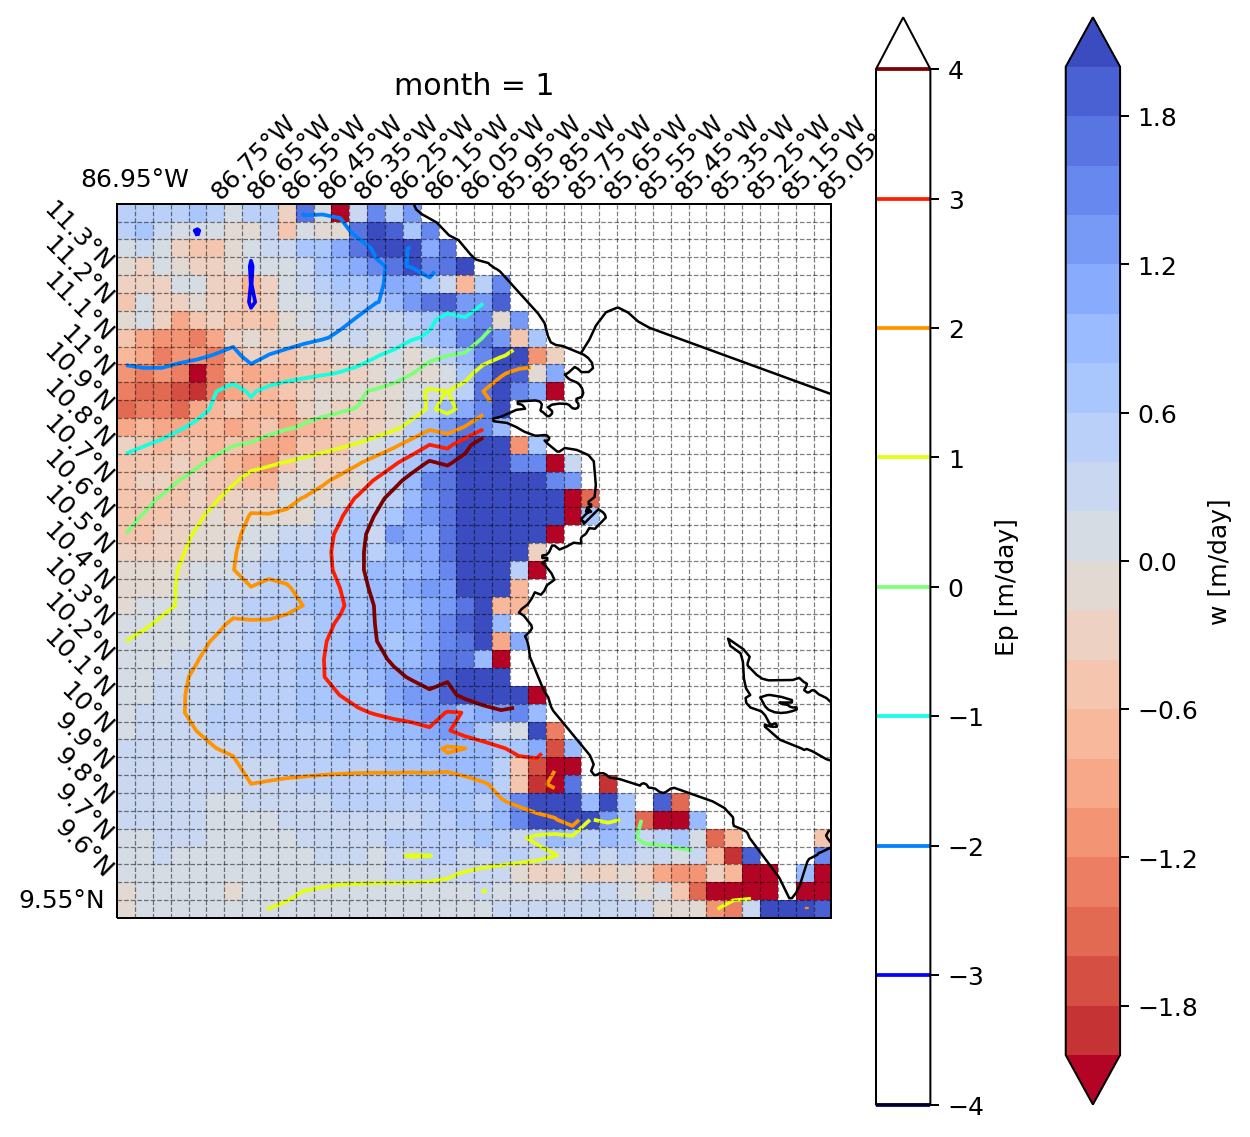

In [26]:
#import cartopy.io.img_tiles as cimgt
#Vertical Velocity & Ekman P. contour
import matplotlib.ticker as mticker

count = 0
plt.clf()

fig=plt.figure(figsize=(8,8))
for mes in np.arange(1,2,1):
             count+=1
             ax=fig.add_subplot(projection=cr.PlateCarree())
             wo_2[wo_2.month==mes].plot(vmin=-2,vmax=2, cmap="coolwarm_r", cbar_kwargs={"label": "w [m/day]"}, robust=True, levels =np.arange(-2,2.2,0.2))
             Ep_2[Ep_2.month==mes].squeeze().plot.contour(add_colorbar=True, cbar_kwargs={"label": "Ep [m/day]"}, levels = np.arange(-4,5,1), cmap='jet')
             ax.coastlines(resolution='10m')
             ax.add_feature(cf.BORDERS)
             ax.set_extent([-87, -85, 9.5,11.5])
                
             gl = ax.gridlines(crs=cr.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
             gl.top_labels = True
             gl.bottom_labels = False
             gl.left_labels = True
             gl.right_labels=False
             gl.xlines = True
             gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
             gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#            mask.plot(add_colorbar= False)
#             plt.savefig("/glade/scratch/pmora/W_Ep_cont_00"+str(mes.values-1)+".jpeg", dpi=300)
#            fig.clear()
             plt.show()

In [ ]:
mask2 = np.ones(50)
lat2 = [9.625,9.675,9.725,9.725,9.775,9.825,9.825,9.775,9.825,9.825,9.825,9.825,9.875,9.925,9.975,10.025,10.075,10.125,10.125,10.175,10.225,10.275,10.325,10.375,10.425,10.475,10.525,10.575,10.625,10.675,10.725,10.775,10.775,10.825,10.825,10.875,10.925,10.975,10.975,10.975,11.025,11.075,11.125,11.175,11.225,11.275,11.275,11.325,11.375,11.425]
lon2 = [-85.175,-85.225,-85.275,-85.325,-85.375,-85.425,-85.475,-85.525,-85.575,-85.625,-85.675,-85.725,-85.725,-85.725,-85.725,-85.775,-85.825,-85.825,-85.875,-85.925,-85.925,-85.925,-85.925,-85.925,-85.875,-85.825,-85.825,-85.775,-85.725,-85.725,-85.725,-85.725,-85.775,-85.825,-85.875,-85.925,-85.925,-85.875,-85.825,-85.775,-85.775,-85.775,-85.825,-85.875,-85.925,-85.925,-85.975,-86.025,-86.075,-86.125]
df = pd.DataFrame({"mask":mask2, "lat":lat2, "lon":lon2})

df_pv = df.pivot(index="lat", columns="lon")
df_pv = df_pv.droplevel(0, axis=1)
#df_pv

mask2 = xr.DataArray(data=df_pv)*1
mask2.values


#df

<Figure size 1080x720 with 0 Axes>

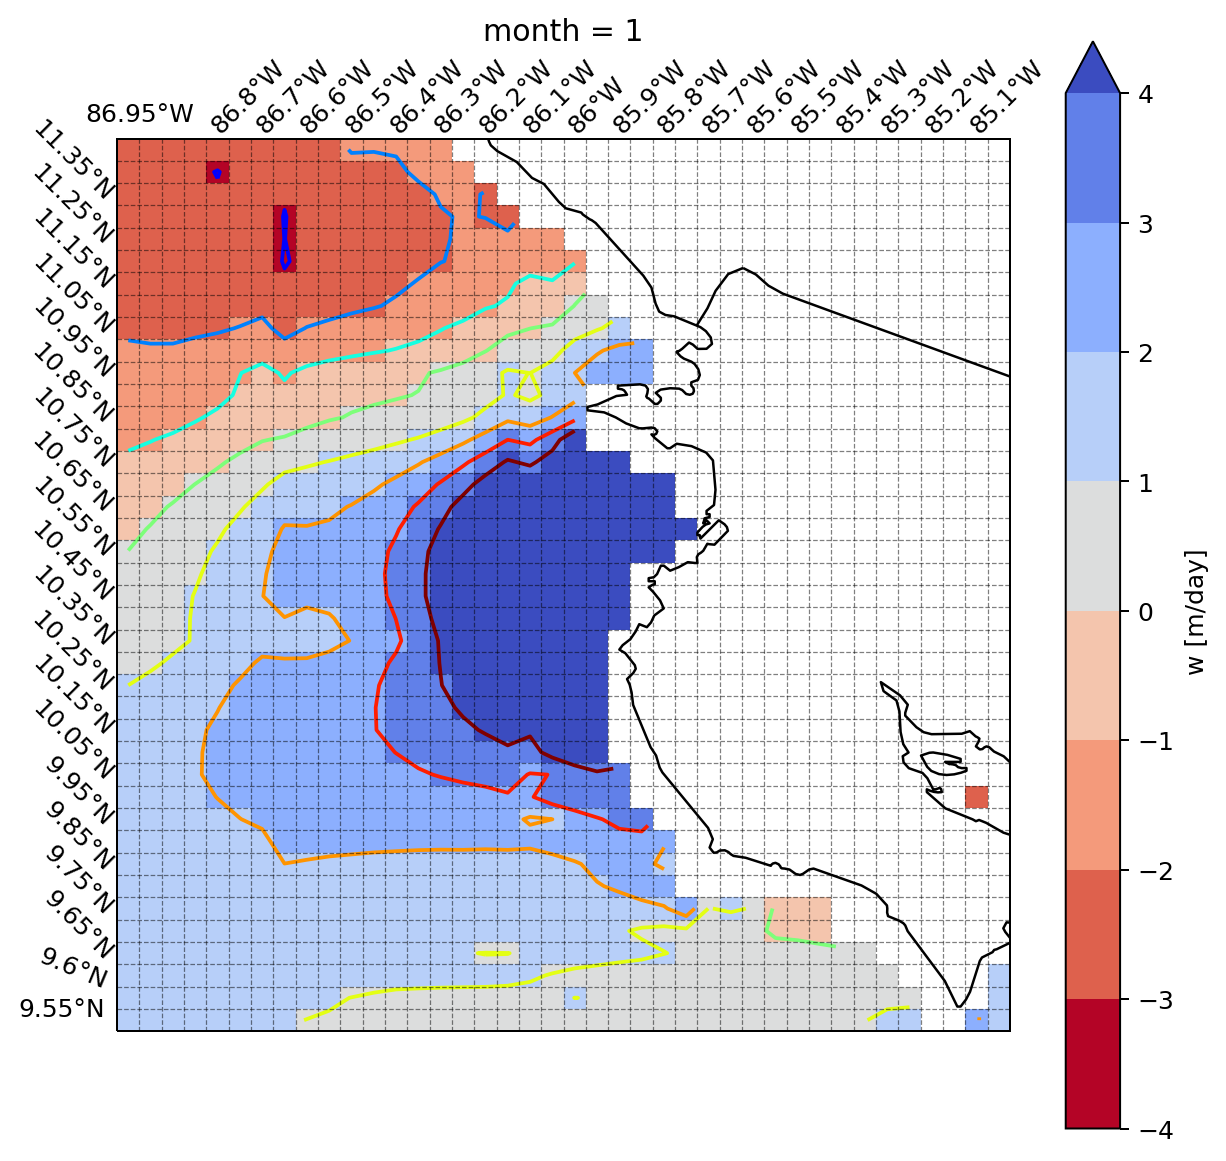

In [28]:
#import cartopy.io.img_tiles as cimgt
#Ekman P
import matplotlib.ticker as mticker

count = 0
plt.clf()

fig=plt.figure(figsize=(8,8))
for mes in np.arange(1,2,1):
             count+=1
             ax=fig.add_subplot(projection=cr.PlateCarree())
             Ep_2[Ep_2.month==mes].plot(vmin=-4,vmax=4, cmap="coolwarm_r", cbar_kwargs={"label": "w [m/day]"}, robust=True, levels =np.arange(-4,5,1))
             Ep_2[Ep_2.month==mes].squeeze().plot.contour(add_colorbar=False, levels = np.arange(-4,5,1), cmap='jet')
             ax.coastlines(resolution='10m')
             ax.add_feature(cf.BORDERS)
             ax.set_extent([-87, -85, 9.5,11.5])
                
             gl = ax.gridlines(crs=cr.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
             gl.top_labels = True
             gl.bottom_labels = False
             gl.left_labels = True
             gl.right_labels=False
             gl.xlines = True
             gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
             gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#             mask2.plot(add_colorbar= False)
#             plt.savefig("/glade/scratch/pmora/W_Ep_cont_00"+str(mes.values-1)+".jpeg", dpi=300)
#            fig.clear()
             plt.show()

<Figure size 1080x720 with 0 Axes>

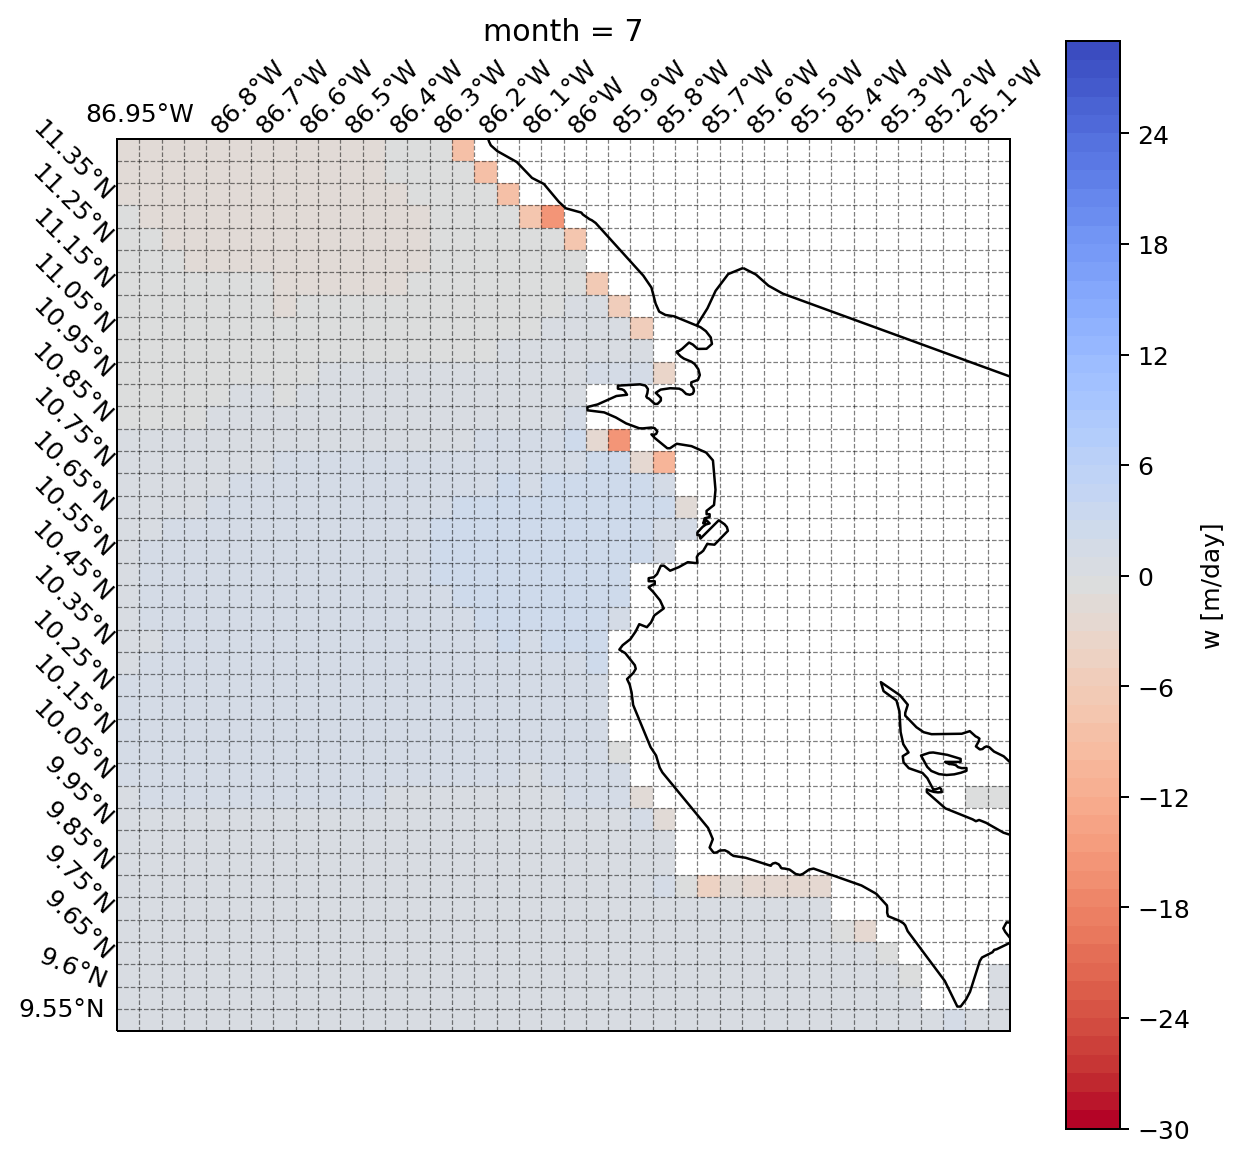

In [28]:
#import cartopy.io.img_tiles as cimgt
#Ekman P
import matplotlib.ticker as mticker

count = 0
plt.clf()

fig=plt.figure(figsize=(8,8))
for mes in np.arange(7,8,1):
             count+=1
             ax=fig.add_subplot(projection=cr.PlateCarree())
             Ep_2[Ep_2.month==mes].plot(cmap="coolwarm_r", cbar_kwargs={"label": "w [m/day]"}, robust=True, levels= np.arange(-30,30,1))
             #Ep_2[Ep_2.month==mes].plot(vmin=-4,vmax=4, cmap="coolwarm_r", cbar_kwargs={"label": "w [m/day]"}, robust=True, levels =np.arange(-4,5,1))
             #Ep_2[Ep_2.month==mes].squeeze().plot.contour(add_colorbar=False, robust=True , cmap='jet')
             #Ep_2[Ep_2.month==mes].squeeze().plot.contour(add_colorbar=False, levels = np.arange(-4,5,1), cmap='jet')
             ax.coastlines(resolution='10m')
             ax.add_feature(cf.BORDERS)
             ax.set_extent([-87, -85, 9.5,11.5])
                
             gl = ax.gridlines(crs=cr.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
             gl.top_labels = True
             gl.bottom_labels = False
             gl.left_labels = True
             gl.right_labels=False
             gl.xlines = True
             gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.05))
             gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.05))
#             mask2.plot(add_colorbar= False)
#             plt.savefig("/glade/scratch/pmora/W_Ep_cont_00"+str(mes.values-1)+".jpeg", dpi=300)
#            fig.clear()
             plt.show()

In [ ]:
from matplotlib.animation as animation
from IPython.display import HTML

In [ ]:
save_animation=True

# Setup initial plot
fig= plt.figure(figsize=(18,18))
ax=fig.add_subplot(projection=cr.PlateCarree())
ax.coastlines(resolution='10m')
ax.add_feature(cf.BORDERS)
ax.set_extent([-87, -85, 9.5,11.5])
gl = ax.gridlines(crs=cr.PlateCarree(), linewidth=0.5, color='black', alpha=0.5, linestyle='--', draw_labels=True)
gl.top_labels = True
gl.bottom_labels = False
gl.left_labels = True
gl.right_labels=False
gl.xlines = True
gl.xlocator = mticker.FixedLocator(np.arange(-87,-85,0.3))
gl.ylocator = mticker.FixedLocator(np.arange(9.5,11.5,0.3))

# Para hacer la animacion hay que quitar la colorbar
def animate(month):
    print(month)
    wo_2[wo_2.month==month].plot(ax=ax,vmin=-2,vmax=2, add_colorbar= False, 
                                   levels =np.arange(-2,2.2,0.2),cmap="coolwarm_r")
    
    Ep_2[Ep_2.month==month].squeeze().plot.contour(add_colorbar=False, cmap='jet')

anim = animation.FuncAnimation(fig, animate, frames=wo_2.month.values, repeat=True)

contourfW = wo_2[wo_2.month==1].plot(ax=ax,vmin=-2,vmax=2, add_colorbar= False, 
                                   levels =np.arange(-2,2.2,0.2))
cbar1=fig.colorbar(contourfW)
contourEp= Ep_2[Ep_2.month==1].squeeze().plot.contour(add_colorbar=False, cmap='jet')
cbar2=fig.colorbar(contourEp)

#if save_animation:
#    anim.save('/glade/scratch/pmora/test.gif',fps=25,
#              dpi=200,
#             )

#HTML(anim.to_jshtml())

if save_animation:
    writergif = animation.PillowWriter(fps=0.5)
    anim.save('/glade/scratch/pmora/test_anim.gif',writer=writergif)
#    , fps=25,extra_args=['-vcodec', 'libx264'],dpi=200,
             
plt.show()

In [93]:
image = wo_2.sel(month=wo_2.month[0].values).plot(ax=ax,vmin=-2,vmax=2,transform=cr.PlateCarree(),
 cmap="coolwarm_r", cbar_kwargs={"label": "w [m/day]"}, robust=True, levels =np.arange(-2,2.2,0.2))

In [99]:
wo_2.sel(month=wo_2.month[0].values).plot(ax=ax,vmin=-2,vmax=2,transform=cr.PlateCarree(),
 cmap="coolwarm_r", cbar_kwargs={"label": "w [m/day]"}, robust=True, levels =np.arange(-2,2.2,0.2))

In [151]:
for mes in wo_2.month:
    print(mes.values-1)

0
1
2
3
4
5
6
7
8
9
10
11
